# Notebook for Discussion on "pH" Effects on Diatoms #

In [80]:
import matplotlib.pyplot as plt
from matplotlib import ticker
from mocsy import mocsy
import numpy as np

Based on the various laboratory results, we have selected the Herve results on Thalassiosira w. to use for an exploration of the impacts of "pH" on diatoms in SalishSeaCast.  These results look like (from Karyn).

In [2]:
#umax (d-1)
pHo = np.array([6.4, 6.8, 7.3, 7.8, 8.2, 8.5])
Herve_GR = np.array([0.5, 0.55, 0.7, 0.78, 0.61, 0.5])
Herve_Err1 = ([0.08, 0.14, 0.20, 0.20, 0.21, 0.15]) # - Error range 0.08 to 0.21
Herve_Err2 = ([0.11, 0.11, 0.15, 0.27, 0.10, 0.12]) # + Error range 0.10 to 0.27

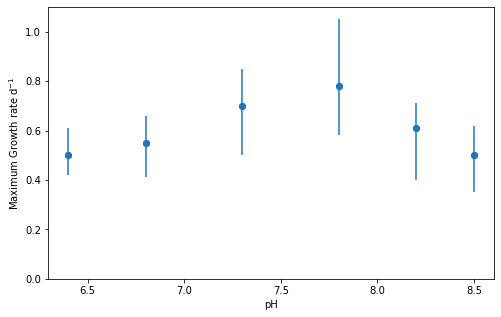

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(pHo, Herve_GR, marker='o', linestyle='None')
ax.errorbar(pHo, Herve_GR, yerr=(Herve_Err1, Herve_Err2), marker='o', linestyle='None')

ax.set_xlabel('pH')
ax.set_ylabel('Maximum Growth rate d$^{-1}$')
ax.set_ylim(0, 1.1);

We believe that the downtrend at high pH is not due to pH per say, but due to a lack of dissolved CO2 for the diatoms to uptake.  This process would be like a nutrient limitation and could be represented by a Michaelis-Menton type relation [co2]/(k + [co2]).

Now we need to get a range of pH and matching CO2.  Do this I will use mocsy, set sal, temp and TA and vary DIC

In [4]:
sal_psu = 26.75
tinsitu = 11.68
depth = 2.5
TA = 1886.4
DIC = np.arange(1400, 3000, 50)
ones = np.ones_like(DIC)

In [5]:
response_tup = mocsy.mvars(temp=tinsitu*ones, sal=sal_psu*ones, alk=TA*ones/1000., 
                           dic=DIC/1000., 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=depth*ones, lat=50*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,sco2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup
co2 = sco2 * 1000

In [6]:
print (pH[0:5])
print (co2[0:5])
print (pH[5:10])
print (co2[5:10])
print (pH[10:15])
print (co2[10:15])
print (pH[15:20])
print (co2[15:20])
print (pH[20:25])
print (co2[20:25])
print (pH[25:30])
print (co2[25:30])

[8.74547756 8.66672945 8.58486739 8.49832458 8.40506895]
[1.99367448 2.5732259  3.32740251 4.32870862 5.69453552]
[8.30232582 8.1861631  8.0510028  7.88985322 7.69906006]
[ 7.62604696 10.49158176 15.01523963 22.69527529 36.45507565]
[7.49286901 7.30411153 7.15038834 7.02820262 6.92930521]
[ 60.05772988  94.10560429 135.1530506  179.90413024 226.57817248]
[6.84713857 6.77722877 6.71656253 6.66306613 6.61527038]
[274.31617427 322.68802155 371.46275981 420.50762086 469.74163702]
[6.57210431 6.5327667  6.4966443  6.4632582  6.43222781]
[519.11291774 568.58679556 618.13928402 667.75328573 717.41629899]
[6.40324594 6.37606127 6.3504657  6.32628503 6.30337203]
[767.11897858 816.85420308 866.6164531  916.40138634 966.20554066]


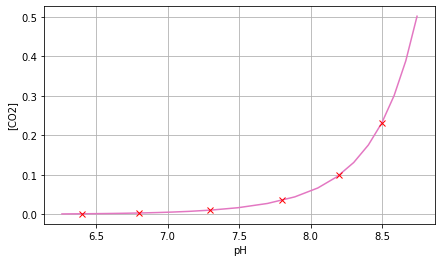

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.plot(pH, 1/co2, c='tab:pink')

ax.set_xlabel('pH')
ax.set_ylabel('[CO2]');
ax.grid()
pHo = np.array([6.4, 6.8, 7.3, 7.8, 8.2, 8.5])
CO2o = np.array([767, 300, 94, 28, 10, 4.33])
ax.plot(pHo, 1/CO2o, 'rx');

Using [CO2] we can construct a MM on it and calculate growth rate as a function of pH

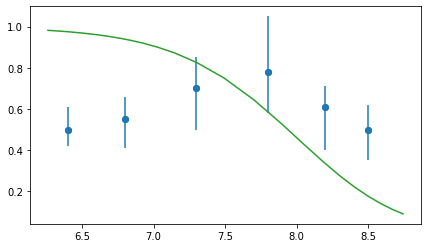

In [8]:
## MMenton using CO2
mm = 1.*co2/(20 + co2)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.scatter(pHo, Herve_GR, marker='o', linestyle='None')
ax.errorbar(pHo, Herve_GR, yerr=(Herve_Err1, Herve_Err2), marker='o', linestyle='None')
ax.plot(pH, mm, color='tab:green');

Now the question is what to do for the low pH end.  This part has less theoretical basis.  It looks like a kind of tanh curve, with a low pH tail at about 0.4 and a high pH piece at about 1.

growth = a + b * tanh((ph-7)/c)

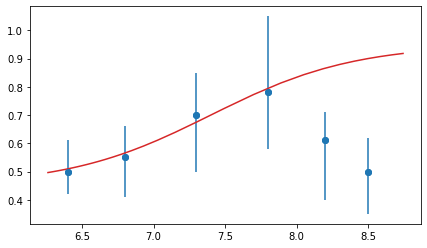

In [9]:
## Tanh using pH
tt = 0.45 + 0.5/2 * (1 + np.tanh((pH - 7.4) / 1))
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.scatter(pHo, Herve_GR, marker='o', linestyle='None')
ax.errorbar(pHo, Herve_GR, yerr=(Herve_Err1, Herve_Err2), marker='o', linestyle='None')
plt.plot(pH, tt, color='tab:red');

There are many different functional forms we could use.  We could base them on [H+] or [OH-] but not knowing which, maybe go simple?

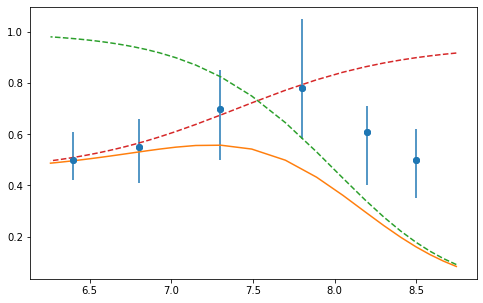

In [10]:
## and Together
growth = mm * tt
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(pHo, Herve_GR, marker='o',linestyle='None')
ax.errorbar(pHo, Herve_GR, yerr=(Herve_Err1, Herve_Err2), marker='o',linestyle='None')
ax.plot(pH, growth);
ax.plot(pH, mm, color='tab:green', ls='--');
ax.plot(pH, tt, color='tab:red', ls='--');

So now as python to fit our two functions to the data.

In [11]:
from scipy.optimize import least_squares

A function that just computes our growth fit

In [12]:
def growth(k, pH, co2):
    mm = co2/(k[1] + co2)
    tt = k[0] * (1 + k[2] * (1 + np.tanh((pH - k[3]) / k[4])))
    return mm * tt, mm, tt

Function to optimize (basically the function we are making minus the data).

Note that our function has 4 parameters and there are only 5 data points.  So its going to be a good fit!

In [13]:
def fun_growth(k):
    pHo = np.array([6.4, 6.8, 7.3, 7.8, 8.2, 8.5])
    CO2o = np.array([767, 300, 94, 28, 10, 4.33])
    Herve_GR = np.array([0.5, 0.55, 0.7, 0.78, 0.61, 0.5])
    gg, mm, tt = growth(k, pHo, CO2o)
    return gg - Herve_GR

In [14]:
# guess our k's and do our fit
theks = np.array([1, 20, 0.5, 7, 1])
res = least_squares(fun_growth, theks)

In [15]:
kk = res.x
print (kk)

[0.49802936 3.54136997 0.37895037 7.19318921 0.42550747]


Yes there was lots of freedom in the fit but note that all the terms are similar to what we guessed.   MM with nearly 1 and 0.02

tanh function with close of 0.5 for the size, 7.3 for the central pH.  Note that the curve is a bit tighter (over about 0.5 rather than 1)

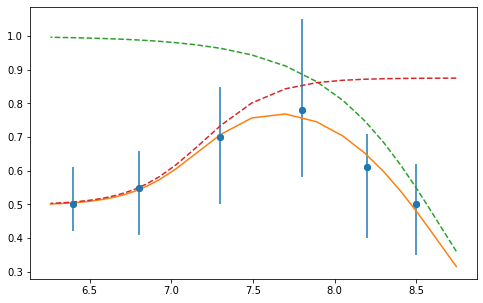

In [16]:
gg, mm, tt = growth(kk, pH, co2)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(pHo, Herve_GR, marker='o',linestyle='None')
ax.errorbar(pHo, Herve_GR, yerr=(Herve_Err1, Herve_Err2), marker='o',linestyle='None')
ax.plot(pH, gg);
ax.plot(pH, mm, color='tab:green', ls='--');
ax.plot(pH, tt, color='tab:red', ls='--');

In [17]:
# Next step, get the scaling correct, we want the growth curve == 1 at DIC = 1713.8, TA = 1886.4, sal_psu=26.75, tinsitu = 11.68

In [18]:
response_tup = mocsy.mvars(temp=11.68, sal=26.75, alk=1.8864, 
                           dic=1.7138, 
                       sil=0., phos=0., patm=0., depth=2.5, lat=50, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pHc,pco2,fco2,co2c,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

In [19]:
co2c = co2c * 1000.
print (pHc, co2c)

[8.15103898] [11.52994591]


In [20]:
cgrowth = growth(kk, pHc, co2c)
cgrowth

(array([0.66660365]), array([0.76502583]), array([0.8713479]))

In [21]:
kk[0] = kk[0] / cgrowth[0]

In [22]:
cgrowth = growth(kk, pHc, co2c)
cgrowth

(array([1.]), array([0.76502583]), array([1.30714541]))

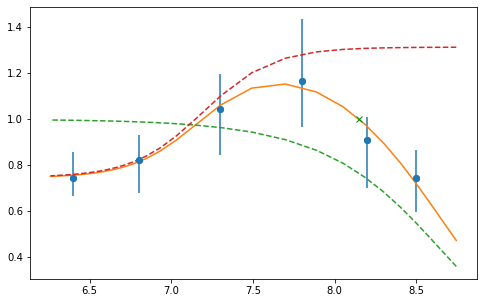

In [23]:
gg, mm, tt = growth(kk, pH, co2)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(pHo, Herve_GR/0.67, marker='o',linestyle='None')
ax.errorbar(pHo, Herve_GR/0.67, yerr=(Herve_Err1, Herve_Err2), marker='o',linestyle='None')
ax.plot(pH, gg);
ax.plot(pH, mm, color='tab:green', ls='--');
ax.plot(pH, tt, color='tab:red', ls='--');
ax.plot(pHc, cgrowth[0], 'gx');

In [24]:
kk

array([0.74711466, 3.54136997, 0.37895037, 7.19318921, 0.42550747])

We ran with this curve but found that it made the system far too productive.  To get the timing of the spring bloom correct, we reduced the over all coefficient, kk[0], by 20%, to 0.598 from 0.747

In [25]:
kk[0] = 0.598
gg80, mm, tt = growth(kk, pH, co2)

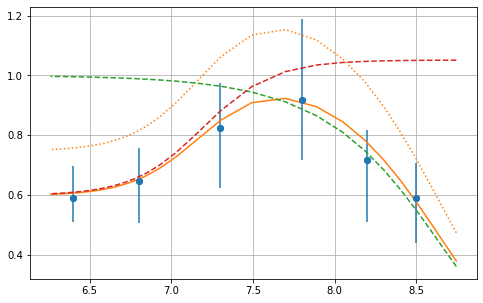

In [26]:
ig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(pHo, Herve_GR/0.85, marker='o',linestyle='None')
ax.errorbar(pHo, Herve_GR/0.85, yerr=(Herve_Err1, Herve_Err2), marker='o',linestyle='None')
ax.plot(pH, gg, color='tab:orange', ls=':');
ax.plot(pH, gg80, color='tab:orange');
ax.plot(pH, mm, color='tab:green', ls='--');
ax.plot(pH, tt, color='tab:red', ls='--');
ax.grid();

Note that nowhere does the new curve hit 1.0.  However, this orange curve is for no light or nutrient limitation.  If there is light or nutrient limitation stronger than the carbon limitation, the relative impact is the red dashed curve which hits 1 at pH=7.7.

Notes:
* green curve, effect of [CO2] only
* red curve, effect of pH only
* orange dashed curve, original fit before scaling
* orange curve, fit after scaling
* Herve points scaled to look nice (e.g. magnitude is arbitrary, relative matters)

## Nice Plot

In [30]:
plt.rcParams['font.size'] = 17

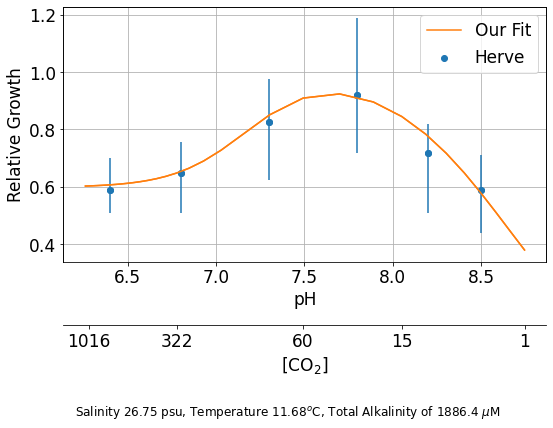

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.scatter(pHo, Herve_GR/0.85, marker='o',linestyle='None', label='Herve')
ax.errorbar(pHo, Herve_GR/0.85, yerr=(Herve_Err1, Herve_Err2), marker='o',linestyle='None')
ax.plot(pH, gg80, color='tab:orange', label='Our Fit');
ax.set_xlabel('pH')
ax.set_ylabel('Relative Growth')
ax.grid();
ax.legend();

ax2 = ax.twiny()
ax2.plot(pH, gg80, color='tab:orange', label='Our Fit');
ax2.set_xticks([6.75, 7.25, 8.25])
fig.subplots_adjust(bottom=0.2)

new_tick_locations = pH[mylist[::-1]]
format_ticks = []
for tick in co2[mylist[::-1]]:
    format_ticks.append(int(tick))

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
#ax2.set_frame_on(True)
#ax2.patch.set_visible(False)

ax2.set_xticks(new_tick_locations)
#ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax2.set_xticklabels(format_ticks);
ax2.set_xlabel(r"[CO$_2$]")
ax.text(6.2, -0.2, 'Salinity 26.75 psu, Temperature 11.68$^o$C, Total Alkalinity of 1886.4 $\mu$M',
       fontsize=12);
fig.tight_layout()
fig.savefig('RelativeGrowth.png', dpi=300)

In [41]:
pH

array([8.74547756, 8.66672945, 8.58486739, 8.49832458, 8.40506895,
       8.30232582, 8.1861631 , 8.0510028 , 7.88985322, 7.69906006,
       7.49286901, 7.30411153, 7.15038834, 7.02820262, 6.92930521,
       6.84713857, 6.77722877, 6.71656253, 6.66306613, 6.61527038,
       6.57210431, 6.5327667 , 6.4966443 , 6.4632582 , 6.43222781,
       6.40324594, 6.37606127, 6.3504657 , 6.32628503, 6.30337203,
       6.28160117, 6.26086463])

In [42]:
co2

array([   1.99367448,    2.5732259 ,    3.32740251,    4.32870862,
          5.69453552,    7.62604696,   10.49158176,   15.01523963,
         22.69527529,   36.45507565,   60.05772988,   94.10560429,
        135.1530506 ,  179.90413024,  226.57817248,  274.31617427,
        322.68802155,  371.46275981,  420.50762086,  469.74163702,
        519.11291774,  568.58679556,  618.13928402,  667.75328573,
        717.41629899,  767.11897858,  816.85420308,  866.6164531 ,
        916.40138634,  966.20554066, 1016.02612246, 1065.86085316])

In [77]:
mylist = [0, 7, 10, 16, 30]